In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime((df['job_posted_date']))
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Trends for Data Analyst Jobs
1. For this we're goign to only be looking at data analyst jobs. So we'll create a copy of our original DataFrame that filters only for Data Analyst roles 

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

2. Extracting the month from the `job_posted_date`


In [3]:
df_DA['job_posted_date'] = df_DA['job_posted_date'].dt.month

3. explode the `job_skills` column.

In [5]:
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,1,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,1,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,1,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,1,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,1,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,3,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,3,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,3,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,3,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


4. let's pivot the data to get the count (or size) for each skill for rach month

In [6]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_date', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_date,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


5. we need to sort the skills to be in order of count to make it easier to plot on the top X

In [7]:
# Create a total Row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

# Order Columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

# Drop total Row
df_DA_pivot.drop('Total', inplace=True)

df_DA_pivot

/var/folders/gh/m3cnb0b569s06fb2gf6yt8m80000gn/T/ipykernel_6041/3142806226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_pivot.drop('Total', inplace=True)


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_date,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


6. (Optional) I like to have my months as names, not numbers, so lets change this


In [14]:
df_DA_pivot.index = df_DA_pivot.index.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [15]:
df_DA_pivot

job_skills,level_0,index,job_posted_date,sql,excel,python,tableau,power bi,r,sas,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
NaN,0,0,1,11336,8170,6606,5596,4285,3607,3830,...,2,0,0,1,0,0,0,1,0,0
Jan,1,1,2,7947,5772,4751,3936,3307,2576,2634,...,0,0,0,0,0,0,0,0,0,0
Feb,2,2,3,7868,5675,4741,4051,3176,2650,2554,...,0,1,0,0,0,0,1,0,0,0
Mar,3,3,4,7553,5496,4557,3776,3106,2399,2598,...,0,0,0,0,1,0,0,0,0,0
Apr,4,4,5,6617,4773,4070,3245,2695,2093,1940,...,0,0,0,0,0,0,0,0,0,1
May,5,5,6,7584,5724,4707,3812,3275,2442,2174,...,0,0,0,0,0,0,0,0,0,0
Jun,6,6,7,7687,5513,4831,3928,3350,2444,2118,...,0,0,1,0,0,0,0,0,0,0
Jul,7,7,8,8823,6482,5576,4533,3859,2975,2560,...,0,0,0,0,0,0,0,0,0,0
Aug,8,8,9,6829,4886,4229,3446,3118,2146,1880,...,0,0,0,0,0,0,0,0,0,0
Sep,9,9,10,7474,5217,4693,3709,3340,2380,2114,...,0,1,0,0,0,0,0,0,0,0


<Axes: >

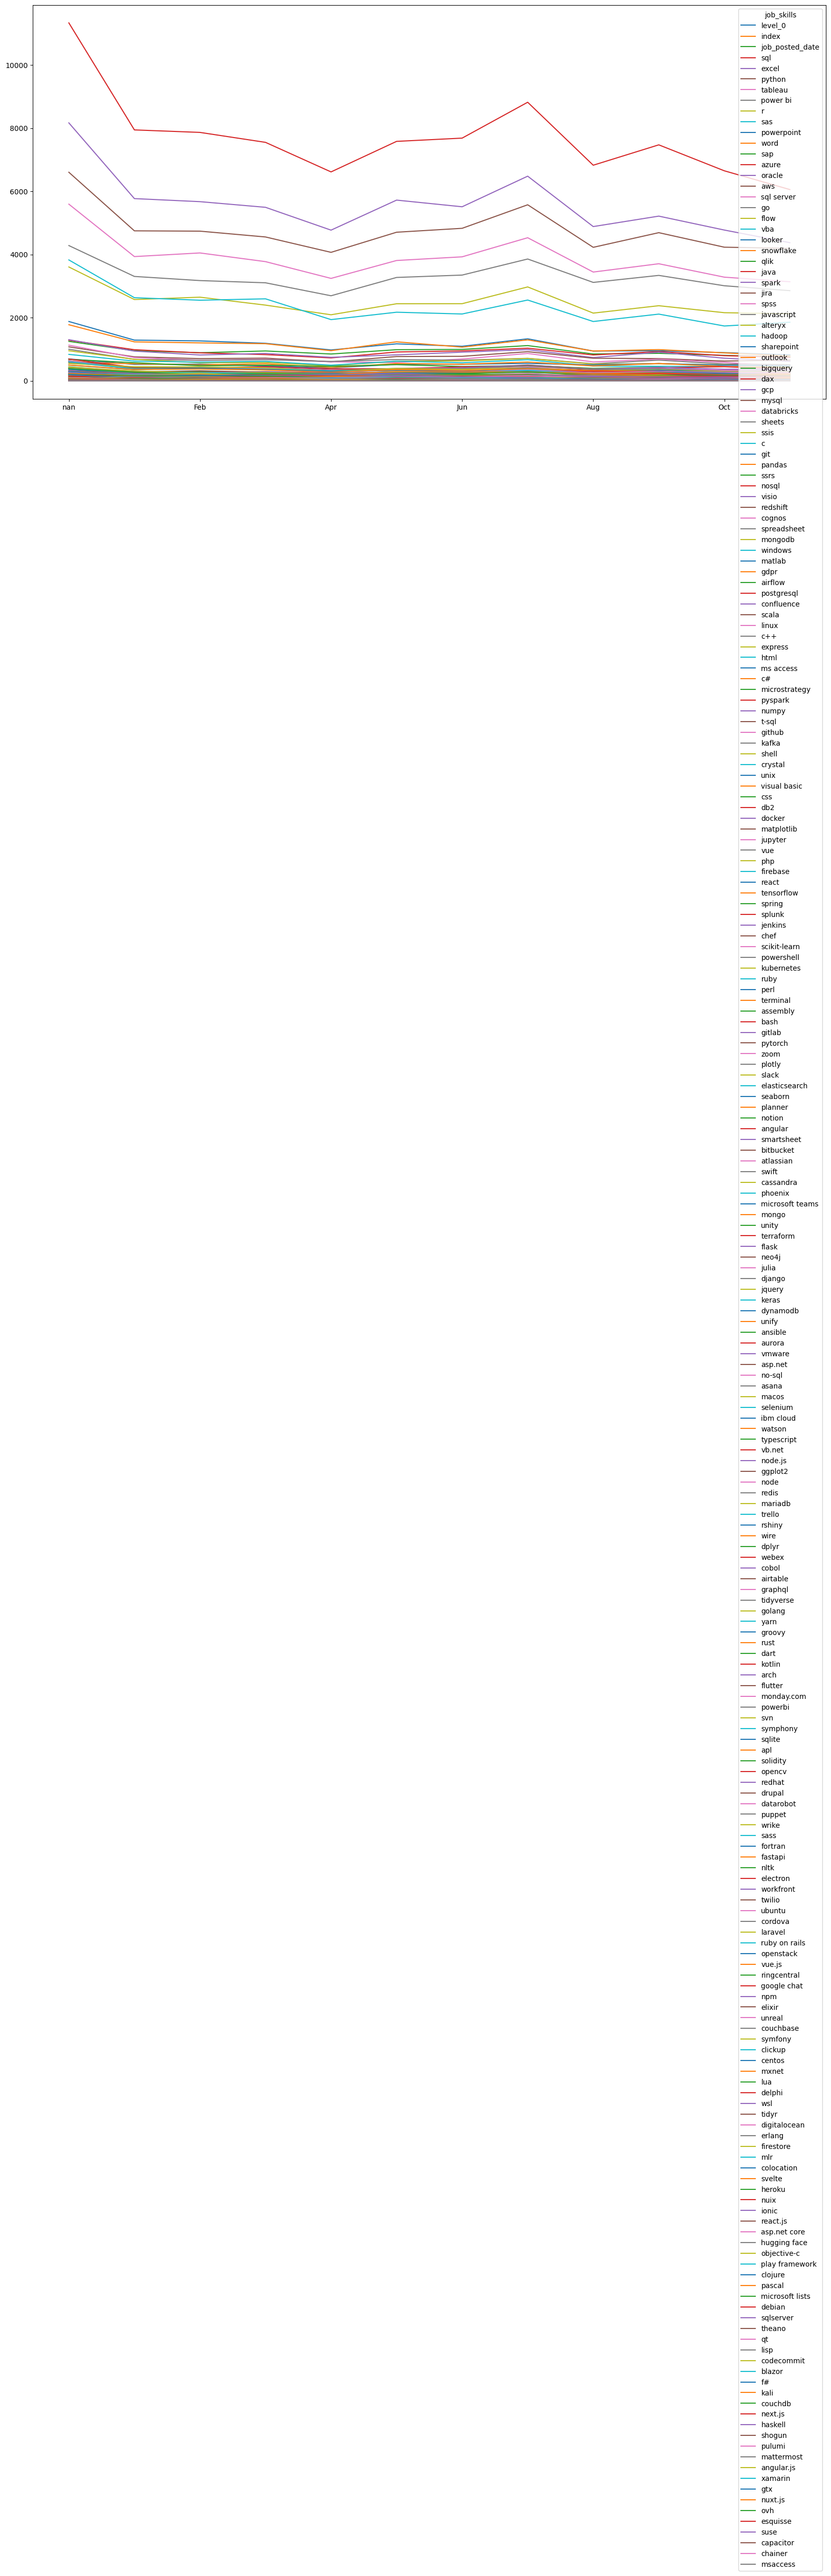

In [16]:
df_DA_pivot.plot(kind='line', figsize=(20, 10))

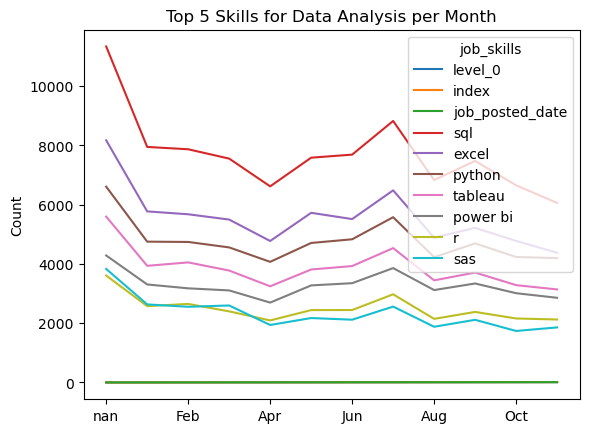

In [20]:
df_DA_pivot.iloc[:, :10].plot(kind='line')
plt.title('Top 5 Skills for Data Analysis per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

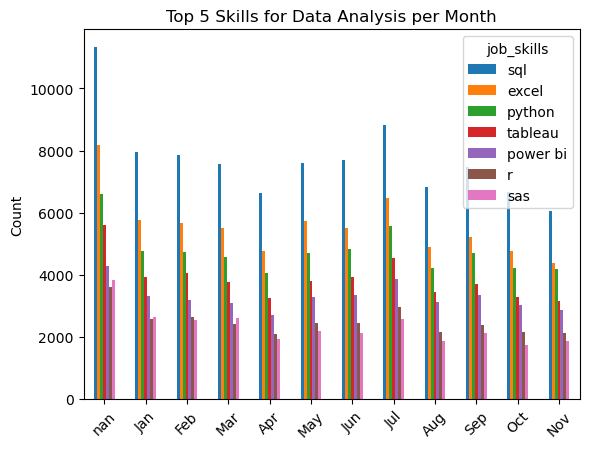

In [24]:
df_DA_pivot.iloc[:, 3:10].plot(kind='bar')
plt.title('Top 5 Skills for Data Analysis per Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()